In [18]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import sklearn 

In [51]:
data = pd.read_csv('http://localhost:8890/tree/Data/2014outagesJerry.csv')

In [52]:
data.head()

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Others,Day_length_hr,Max_temp_F,Avg_Temp_F,...,Max_windspeed_mph,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail
0,1/1/14,0,0,0,0,0,0,8.529,45,42,...,8,3,9,0.01,Fog,1,0,0,0,0
1,1/2/14,0,0,0,0,0,0,8.547,51,47,...,21,7,26,0.00,NaN,0,0,0,0,0
2,1/3/14,1,1,0,0,0,0,8.566,48,43,...,14,6,16,0.00,Fog,1,0,0,0,0
3,1/4/14,0,0,0,0,0,0,8.586,46,40,...,10,6,13,0.00,NaN,0,0,0,0,0
4,1/5/14,4,4,0,0,0,0,8.608,47,39,...,15,8,17,0.00,NaN,0,0,0,0,0


In [100]:
Y = data['Total_outages']
#Y1 = data['Equipment']
Y_train = np.array(Y)
X = data[['Day_length_hr','Avg_Temp_F','Avg_humidity_percent','Avg_windspeed_mph','Max_windgust_mph',
         'Precipitation_in','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]
#X = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent',
#         'Min_humidity_percent','Avg_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph',
#         'Precipitation_in','Event_fog','Event_rain',Event_snow','Event_thunderstorm','Event_Hail']]
X_train = np.array(X)

In [101]:
from sknn.mlp import Regressor, Layer

In [102]:
nn = Regressor(
    layers=[
        Layer("Tanh", units=10),
        Layer("Linear")],
    learning_rate=0.001,
    n_iter=1000,
    batch_size = 10)
nn.fit(X_train, Y_train)

Regressor(batch_size=10, callback=None, debug=False, dropout_rate=None,
     f_stable=0.001,
     hidden0=<sknn.nn.Layer `Tanh`: units=10, frozen=False, name='hidden0'>,
     layers=[<sknn.nn.Layer `Tanh`: units=10, frozen=False, name='hidden0'>, <sknn.nn.Layer `Linear`: units=1, frozen=False, name='output'>],
     learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
     loss_type=None, n_iter=1000, n_stable=10, normalize=None,
     output=<sknn.nn.Layer `Linear`: units=1, frozen=False, name='output'>,
     parameters=None, random_state=None, regularize=None, valid_set=None,
     valid_size=0.0, verbose=None, warning=None, weight_decay=None)

In [103]:
Y_pred = np.round(nn.predict(X_train))

In [104]:
1/300*LA.norm(Y_pred-Y_train,2)

3.2312774222291774

In [105]:
np.mean(Y_train)

1.7917808219178082

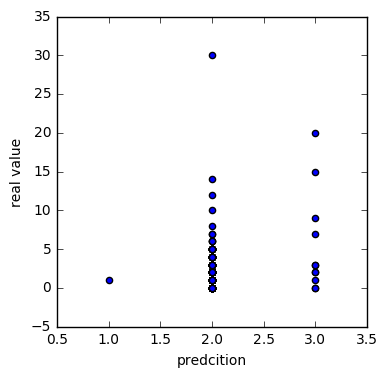

In [106]:
plt.figure(figsize=(4,4))
plt.scatter(Y_pred,Y_train)
#plt.plot([0,50],[0,50],lw=4,color='black')
plt.ylabel('real value')
plt.xlabel('predcition')
plt.show()